<a href="https://colab.research.google.com/github/VijiniEP/DL-Fashion-Classification/blob/pragas/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# To calculate numerical analysis
import numpy as np
import scipy.sparse as sp
from sklearn.impute import SimpleImputer
from numpy import argmax, array_equal
# Store or process in the dataframe
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
 # Train  the test split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# To get the ploting graphs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
# Layers
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D, Dropout, Flatten, MaxPooling2D
# Stop the training when there is no improvement in the loss for three consecutive epochs
from keras.callbacks import EarlyStopping
# Utility functions
from tensorflow.keras.utils import to_categorical
# Sequential model
from tensorflow.keras.models import Sequential, Model
from imgaug import augmenters
from random import randint

Step 1: Obtain the dataset. The Fashion MNIST dataset from Kaggle is loaded in the current phase. First, it clears the system of any existing Kaggle configuration files and directories. The Kaggle library is then installed with pip. The Kaggle API credentials file (kaggle.json) is then uploaded, allowing access to the Kaggle dataset. The credentials file is saved in the user's home folder's.kaggle directory, and its permissions are modified. Using the Kaggle datasets download command, the Fashion MNIST dataset is downloaded from Kaggle. Finally, the code unzips the downloaded files and uses the pandas read_csv method to import the train and test datasets.

In [2]:
# If there is any file .kaggle directory remove it or Delete
!rm -r ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
# Install Kaggle to the working directory
!pip install -q kaggle

In [4]:
# Upload kaggle.json file to the google colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pragask","key":"a3dc9347ff1bb691341e1cd3d8bcf11b"}'}

In [5]:
# Save the file in the correct directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change permission of the working directory
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Download "Fashion MNIST" dataset from the Kaggle
!kaggle datasets download -d zalando-research/fashionmnist

 71% 49.0M/68.8M [00:00<00:00, 140MB/s]
100% 68.8M/68.8M [00:00<00:00, 140MB/s]


In [7]:
# Extract files from the fashion.zip file
!unzip -n 'fashionmnist.zip'

Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [8]:
# Load Data to the working directory

train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

# Load Data
# train = pd.read_csv('fashion-mnist_train.csv', sep=',')
# test = pd.read_csv('fashion-mnist_test.csv', sep=',')

Data Visulization After Step 1

In [9]:
# Train the Head of dataset
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Test Head
test.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Print the number of rows and columns in the train and test datasets
print("Fashion MNIST train -  rows:",train.shape[0]," columns:", train.shape[1])
print("Fashion MNIST test -  rows:",test.shape[0]," columns:", test.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [13]:
train.shape

(60000, 785)

In [12]:
test.shape

(10000, 785)

In [14]:
if train.equals(test):
    print("Both datasets are equal")
else:
    print("Datasets are not equal")

Datasets are not equal


In [15]:
train['label'].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [16]:
# Create dictionaries for all labeles
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

# Distribution Method and the Implementation to get classes.
def get_classes_distribution(train):
    # Get the total count for the each label
    label_counts = train["label"].value_counts()

    # Get the total number of samples
    total_samples = len(train)


    # Count the total number of items related to each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

# Get the distribution, for the classes by using training dataset
get_classes_distribution(train)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


In [17]:
# Get the distribution, for the classes by using testing dataset
get_classes_distribution(test)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


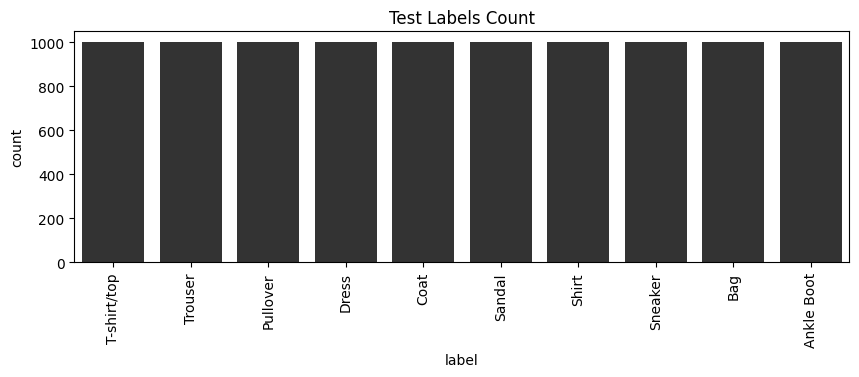

In [18]:
# Plot Labels for the Class Implementation Method for the Training Dataset
def plot_label_per_class(test):
    # Convert trained dataset to the pandas dataframe
    test_df = pd.DataFrame(test)

    # Createing plot
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x='label', data=test_df, palette=['#333333' for i in range(10)])
    plt.xticks(list(labels.keys()), list(labels.values()), rotation='vertical')
    ax.set_title('Test Labels Count')

    plt.show()

# Visualize class distribution by using testing dataset
plot_label_per_class(test)

In [20]:
# Rescale image data
train_images = np.array(train.iloc[:, 1:])
train_labels = np.array(train.iloc[:, 0])
test_images = np.array(test.iloc[:, 1:])
test_labels = np.array(test.iloc[:, 0])

In [21]:
# Reshape images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [22]:
# Fix the data type of images and Normalize the images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [23]:
#  Train Images in the Dataset
train_images

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [24]:
# View Trained Data labels
train_labels

array([2, 9, 6, ..., 8, 8, 7])

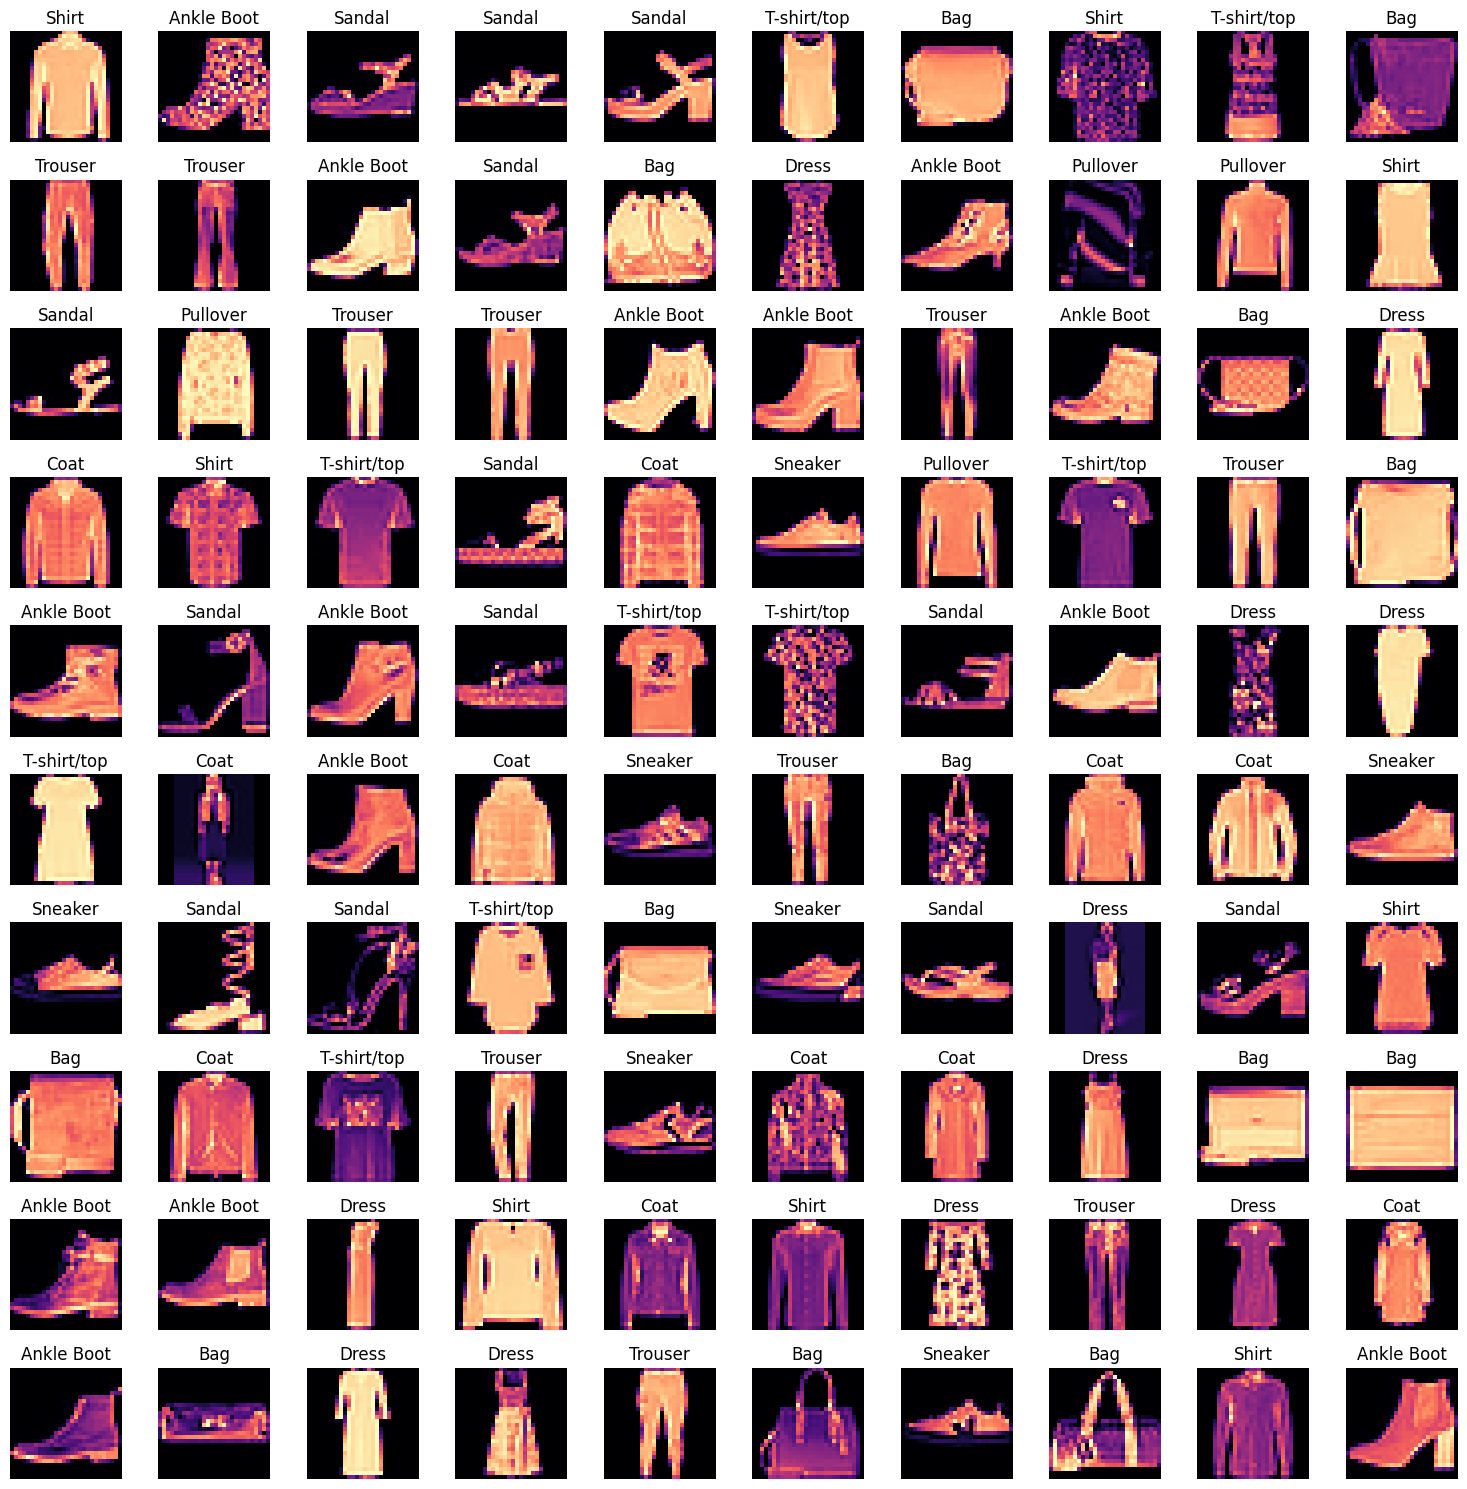

In [25]:
#Data Visualization
#Class Names given from the Dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#First few trained images with therir labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(train_images))
    img = train_images[data_idx].reshape([28,28])
    label = labels[train_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

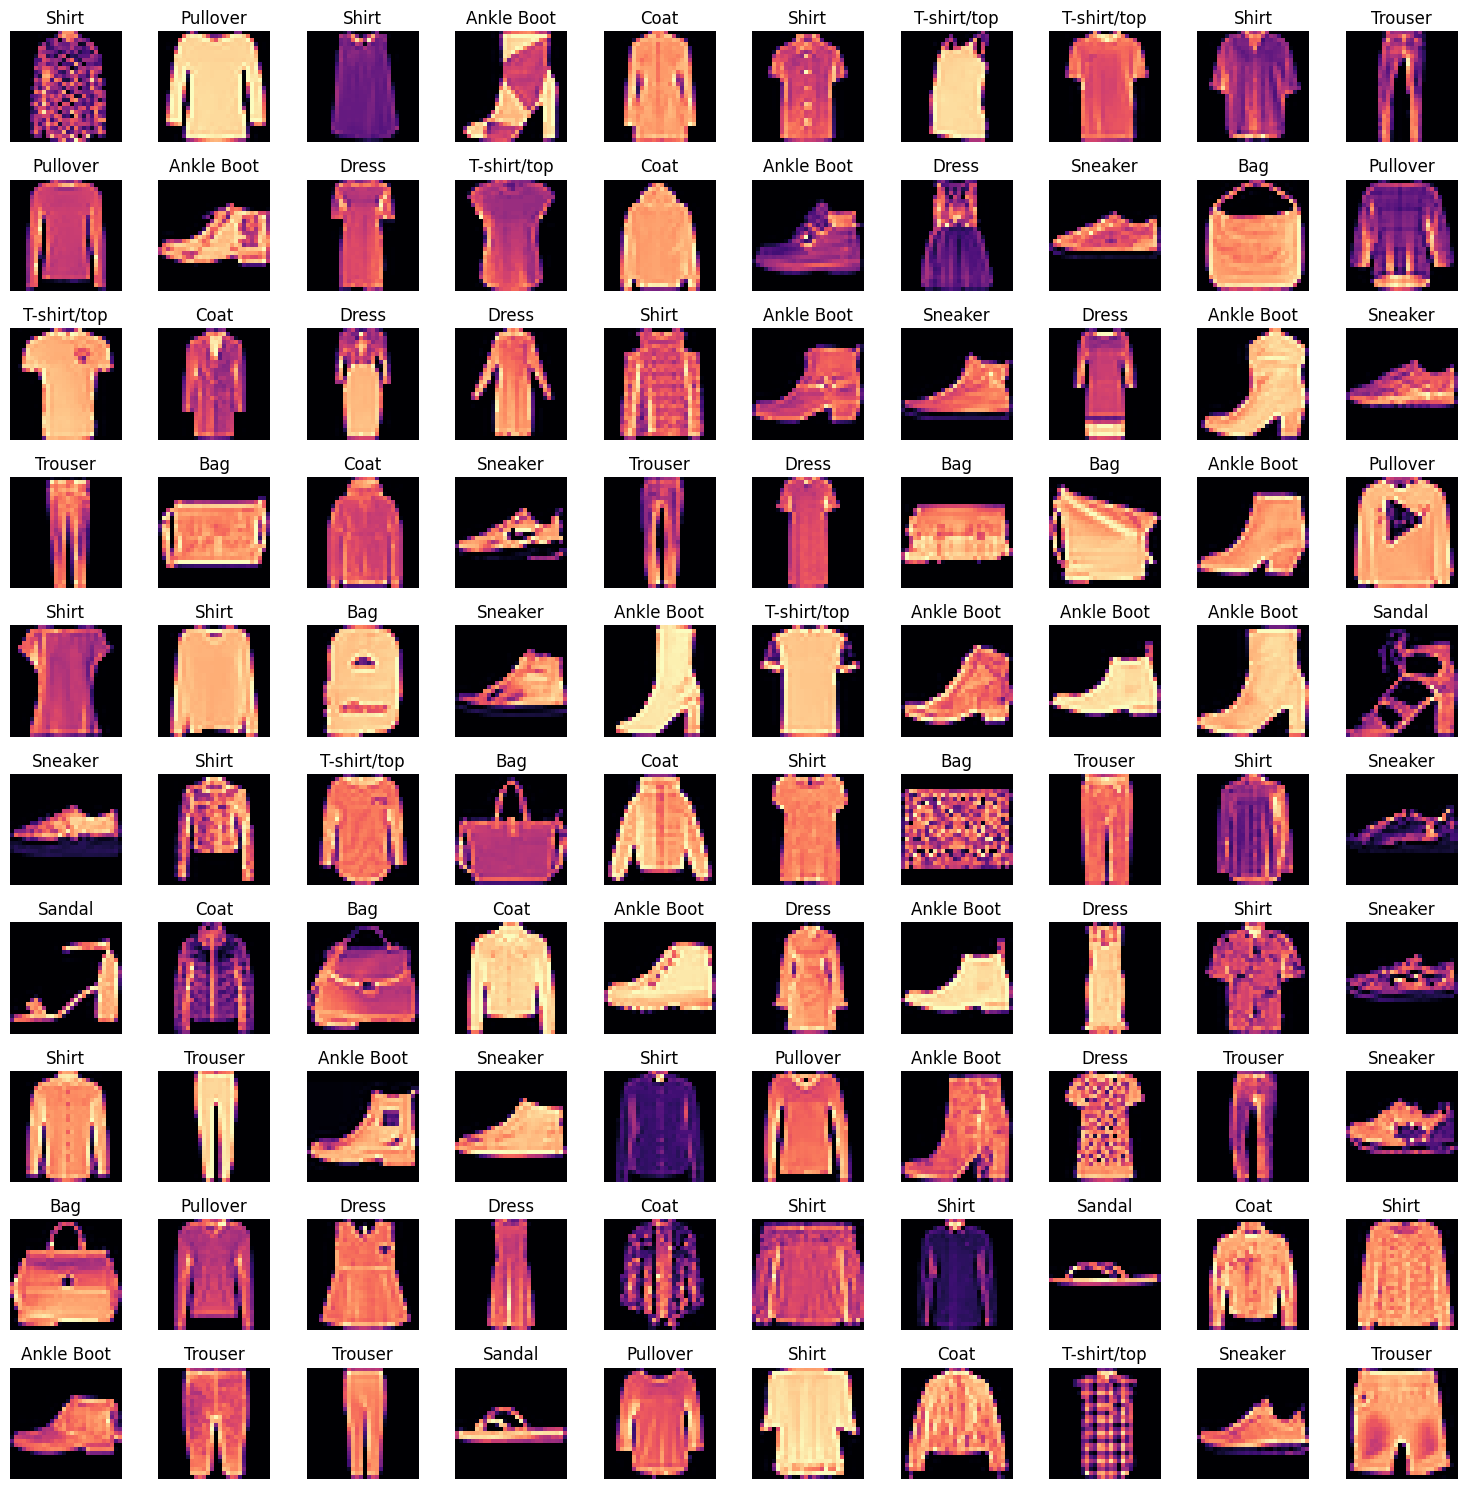

In [26]:
#First few tested images with their labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(test_images))
    img = test_images[data_idx].reshape([28, 28])
    label = labels[test_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [27]:
# Rescale images
train_images = np.array(train.iloc[:, 1:])
train_labels = np.array(train.iloc[:, 0])
test_images = np.array(test.iloc[:, 1:])
test_labels = np.array(test.iloc[:, 0])

In [28]:
# Reshape images
train_images = train_images.reshape(train_images.shape[0], 784)
test_images = test_images.reshape(test_images.shape[0], 784)

# Fix the data type and Normalize the images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [29]:
# Divide the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
x = scaler.fit_transform(x_train)
x[0:5]

array([[-0.00960813, -0.02239017, -0.02829561, ..., -0.15932114,
        -0.09217697, -0.0315794 ],
       [-0.00960813, -0.02239017, -0.02829561, ..., -0.15932114,
        -0.09217697, -0.0315794 ],
       [-0.00960813, -0.02239017, -0.02829561, ..., -0.15932114,
        -0.09217697, -0.0315794 ],
       [-0.00960813, -0.02239017, -0.02829561, ..., -0.15932114,
        -0.09217697, -0.0315794 ],
       [-0.00960813, -0.02239017, -0.02829561, ..., -0.15932114,
        -0.09217697, -0.0315794 ]], dtype=float32)

In [32]:
# Print shape of the result arrays to verify the fragment
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing images shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training images shape: (48000, 784)
Training labels shape: (48000,)
Testing images shape: (12000, 784)
Testing labels shape: (12000,)


train modal and test with test data and get accuracy

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Build and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # We can adjust the number of neighbors
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8561666666666666


In [33]:
pred = knn.predict(x_test)
pred[0:5]

array([7, 8, 8, 9, 9])

In [34]:
y_test[0:5]

array([7, 8, 8, 5, 9])

In [35]:
accuracies = []
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    accuracy = model.score(x_test, y_test)
    accuracies.append(accuracy)

In [36]:
accuracies

[0.8485833333333334,
 0.8449166666666666,
 0.8561666666666666,
 0.8550833333333333,
 0.8558333333333333,
 0.8574166666666667,
 0.8551666666666666,
 0.8545,
 0.8530833333333333,
 0.8524166666666667]

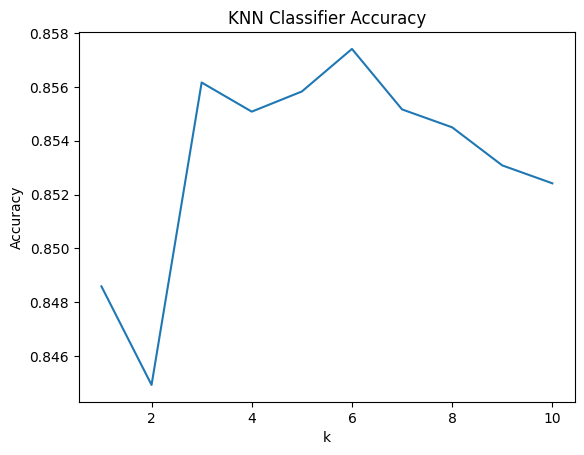

Best k value: 6
Highest accuracy: 0.8574166666666667


In [37]:
k_values = []

for i in range(1,11):
  k_values.append(i)

# Finding the k value with highest accuracy
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)

# Plot for the accuracies for each k value
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy')
plt.show()

print(f'Best k value: {best_k}')
print(f'Highest accuracy: {best_accuracy}')


In [38]:
# Create the KNN classifier with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)

# Training the model by using training data
knn.fit(x_train, y_train)

# Testing the model by using testing data
accuracy = knn.score(x_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8574166666666667


In [39]:
predicted_labels = knn.predict(x_test)
actual_labels = y_test

In [40]:
predicted_labels

array([7, 8, 8, ..., 9, 5, 5])

In [41]:
print(classification_report(y_test, predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.75      0.89      0.81      1232
     Trouser       0.99      0.96      0.97      1174
    Pullover       0.73      0.83      0.78      1200
       Dress       0.89      0.88      0.88      1242
        Coat       0.78      0.74      0.76      1185
      Sandal       0.99      0.86      0.92      1141
       Shirt       0.67      0.54      0.60      1243
     Sneaker       0.90      0.97      0.93      1224
         Bag       0.98      0.95      0.96      1149
  Ankle boot       0.92      0.97      0.94      1210

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



In [42]:
from tabulate import tabulate

results = []

for ind, row in enumerate(x_test[:36]):
    predicted_class = labels[predicted_labels[ind]]
    actual_class = labels[actual_labels[ind]]
    results.append([predicted_class, actual_class])
# results[0:100]

# Show only first 100 values
print(tabulate(results[0:100], headers=['Predicted Class', 'Actual Class'], tablefmt='grid'))

+-------------------+----------------+
| Predicted Class   | Actual Class   |
+===================+================+
| Sneaker           | Sneaker        |
+-------------------+----------------+
| Bag               | Bag            |
+-------------------+----------------+
| Bag               | Bag            |
+-------------------+----------------+
| Ankle Boot        | Sandal         |
+-------------------+----------------+
| Ankle Boot        | Ankle Boot     |
+-------------------+----------------+
| Trouser           | Trouser        |
+-------------------+----------------+
| Pullover          | Pullover       |
+-------------------+----------------+
| T-shirt/top       | Shirt          |
+-------------------+----------------+
| Shirt             | Shirt          |
+-------------------+----------------+
| Coat              | Pullover       |
+-------------------+----------------+
| Ankle Boot        | Sandal         |
+-------------------+----------------+
| T-shirt/top       | T-s

<ipython-input-43-c4e33f78dffd>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 6, ind+1)


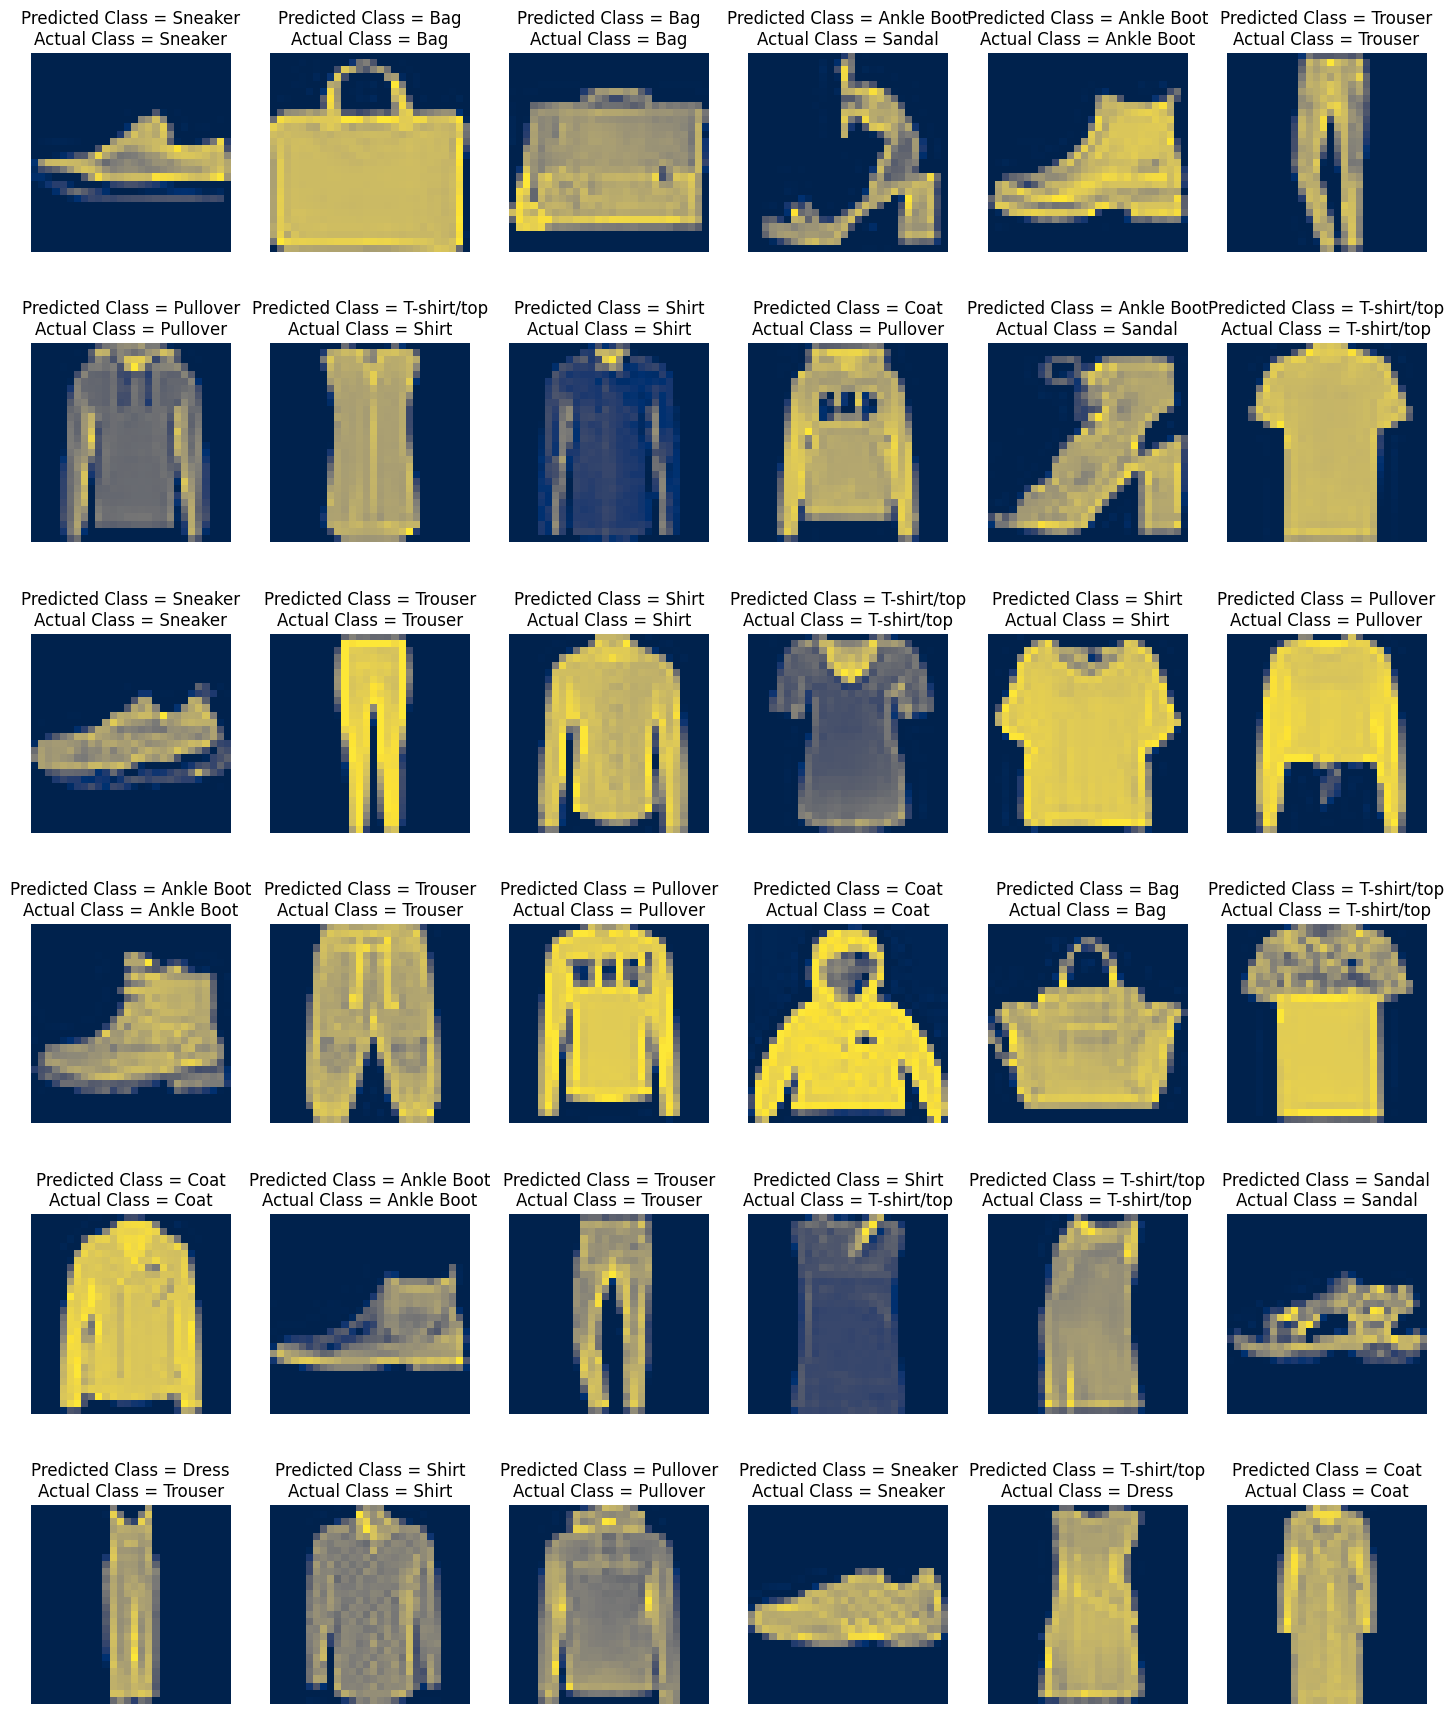

In [43]:
# Predict the targets of each image
fig, ax = plt.subplots(figsize=(18, 22))
for ind, row in enumerate(x_test[:36]):
    plt.subplot(6, 6, ind+1)
    plt.title('Predicted Class = ' + labels[predicted_labels[ind]] + '\n' + 'Actual Class = ' + labels[actual_labels[ind]])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.savefig('./knn_predicted_target_images.png')
    plt.imshow(img, cmap='cividis')